In [1]:
import math
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd
import warnings

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

warnings.filterwarnings('ignore')

In [2]:
# Load Auto MPG Dataset
dataset_name = 'auto-mpg.data'
dataset_url = f'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/{dataset_name}'

!wget -qnc {dataset_url}

In [3]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

# Load the dataset into a Pandas data frame.
raw_dataset = pd.read_csv("./auto-mpg.data", names=column_names, na_values="?", comment='\t',
                          sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# Clean data
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [5]:
dataset.shape

(398, 8)

In [6]:
# Use the dropna() method to remove data samples that are not fully populated.
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [7]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


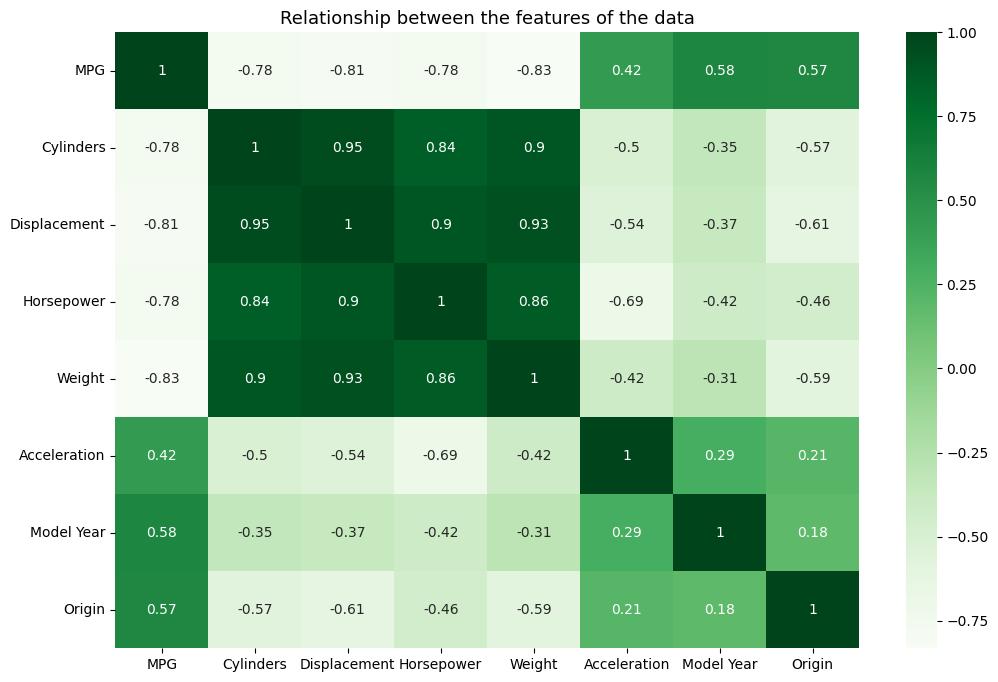

In [9]:
# Explore Dataset
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap=plt.cm.Greens, annot=True)
plt.title('Relationship between the features of the data', fontsize=13)
plt.show()

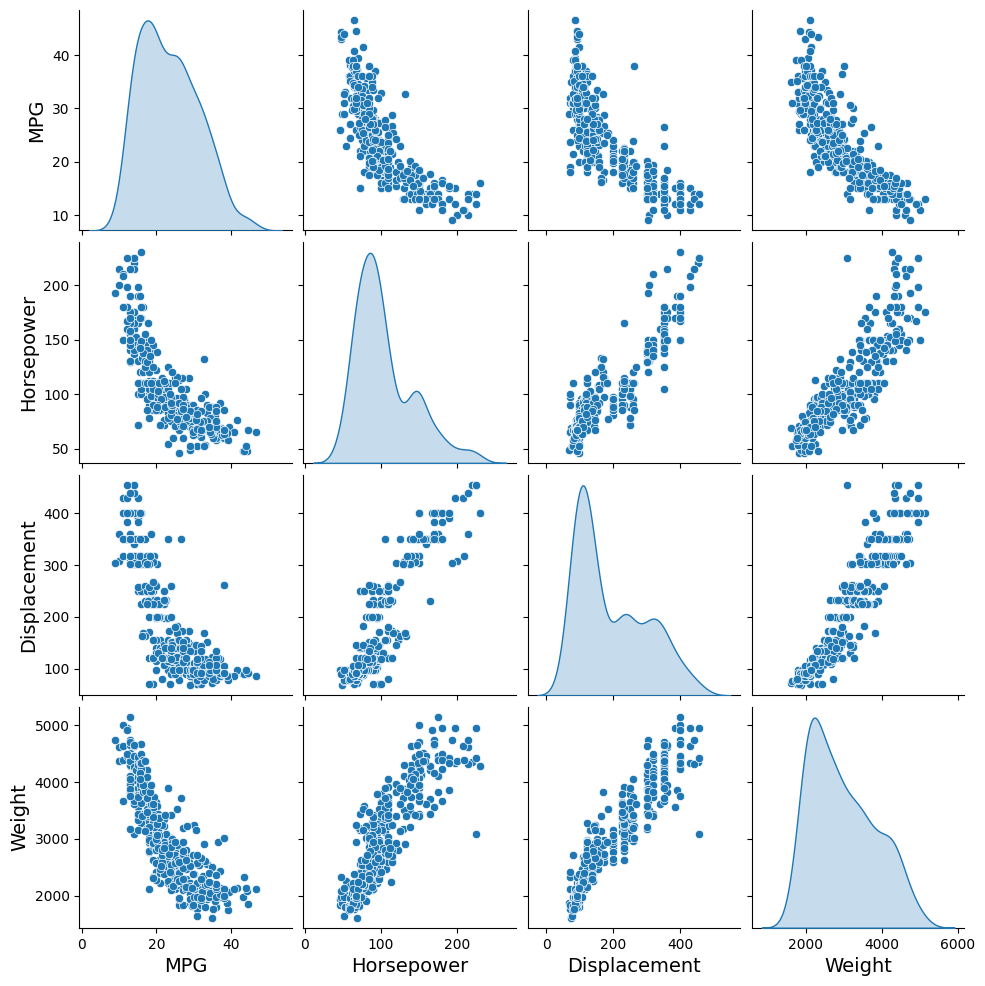

In [10]:
sns.pairplot(dataset[['MPG', 'Horsepower', 'Displacement', 'Weight']], diag_kind='kde');

In [11]:
# Train-Test Split
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

print(train_dataset.shape)
print(test_dataset.shape)

train_dataset

(314, 8)
(78, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,26.0,4,96.0,69.0,2189.0,18.0,72,2
276,21.6,4,121.0,115.0,2795.0,15.7,78,2
248,36.1,4,91.0,60.0,1800.0,16.4,78,3
56,26.0,4,91.0,70.0,1955.0,20.5,71,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...,...
218,36.0,4,79.0,58.0,1825.0,18.6,77,2
281,19.8,6,200.0,85.0,2990.0,18.2,79,1
342,30.0,4,135.0,84.0,2385.0,12.9,81,1
238,33.5,4,98.0,83.0,2075.0,15.9,77,1


In [12]:
# Check datset stats
dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.445918,7.805007
Cylinders,5.471939,1.705783
Displacement,194.411990,104.644004
Horsepower,104.469388,38.491160
Weight,2977.584184,849.402560
Acceleration,15.541327,2.758864
Model Year,75.979592,3.683737
Origin,1.576531,0.805518


In [13]:
# Split features from target value
X_train = train_dataset.copy()
X_test  = test_dataset.copy()

# Separate target values from features.
y_train = X_train.pop('MPG')
y_test  = X_test.pop('MPG')

In [14]:
X_train_stats = X_train.describe().transpose()[['mean', 'std']]
X_train_stats

,mean,std
Cylinders,5.531847,1.729449
Displacement,197.855096,106.501896
Horsepower,105.971338,39.636557
Weight,3005.745223,859.060925
Acceleration,15.510828,2.803560
Model Year,75.910828,3.688989
Origin,1.579618,0.808322


In [15]:
# Normalise feature dataset
# Convert the Horsepower feature in the dataframe to a NumPy array.
hp = np.array(X_train['Horsepower'])

# Create the normalization layer (for Horsepower).
hp_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# Call the `adapt` method to apply the normalization.
hp_normalizer.adapt(hp)

print('Mean:  ', hp_normalizer.mean.numpy()[0])
print('Std:   ', math.sqrt(hp_normalizer.variance.numpy()[0]))
print('Count: ', hp_normalizer.count.numpy())

Mean:   105.97134
Std:    39.573391877959644
Count:  0
